<a href="https://colab.research.google.com/github/techfreakydeepak/Bike_sharing_demand_prediction/blob/main/bike_sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
# Let's import some important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [71]:
# Give the path of the folder to access all the csv data files
url='https://drive.google.com/file/d/1dZ7p614gC_iwxHwcj-1N0Lc155AGMTJS/view?usp=sharing' 
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

In [72]:
# Let's read the csv file
df_Bike_sharing_demand=pd.read_csv(url,encoding= 'unicode_escape')

Dataset First View

In [73]:
# check top five rows to get the overview of data
df_Bike_sharing_demand.head()



,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [74]:
# check bottom four rows to get the overview of data
df_Bike_sharing_demand.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


Dataset Rows & Columns count

In [75]:
# shape tell us rows and columns)
print('Shape of data is:' ,df_Bike_sharing_demand.shape)

Shape of data is: (8760, 14)


♦ By this we can say that in our dataset 8760 rows and 14 columns

Dataset Rows & Columns count







In [76]:
# shape tell us rows and columns)
print('Shape of data is:' ,df_Bike_sharing_demand.shape)

Shape of data is: (8760, 14)


In [77]:
# shape tell us rows and columns)
print('Shape of data is:' ,df_Bike_sharing_demand.shape)

Shape of data is: (8760, 14)


♦ By this we can say that in our dataset 8760 rows and 14 columns

Dataset Information

In [78]:
# Let's take information about data
df_Bike_sharing_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

♦ Here we see data type of "Date" column is object. We'll go ahead and convert it to datetime

Understanding Your Variables

Variables Description

In [79]:
# columns Name
df_Bike_sharing_demand.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

Variables Description

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

Attribute Information:

Date : year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of he day


Temperature-Temperature in Celsius

Humidity- Humidity percentage in atmosphere

Windspeed- How fast is the wind blowing(m/s)

Visibility- Visibility(10m)

Dew point temperature- At this point the air cannot hold more

Water in the gas form(°C)

Solar Radiation- The energy emitted by the Sun(MJ/m2)

Rainfall- Rainfall in mm

Snowfall- snow fall in cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)







In [80]:
# check description about dataset
df_Bike_sharing_demand.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN



♦ Here we can divide it into two type

1-Numeric features - 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)

2- Categorical features - 'Seasons', 'Holiday', 'Functional Day'


Copy of our dataset

Now we will make a copy of our dataset so that any changes will not affect the original dataset

In [81]:
# copy of dataset
df=df_Bike_sharing_demand.copy()

check, our copied data is perfect or not




In [82]:
# check top five row of our copied data
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


Check Unique Values for Categorical features.

In [83]:
# for 'Functioning Day'
df['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [84]:
# for 'Seasons'
df['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [85]:
# for Holiday
df['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

Null Values

In [86]:
# let's check null values 
null_values_in_data=df.isnull().sum().sort_values(ascending=False)
print(null_values_in_data)

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


Here we see there is no any null vlaues in our dataset

Duplicate Values

In [87]:
# let's check duplicate values in our dataset
len(df[df.duplicated()])

0

we find there is no any duplicate value

Now change data type of "Date" columne

In [88]:

# we can see that data type of date is object we change it into datetime
df['Date']=pd.to_datetime(df['Date'])


Check data type of our all columns

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

Now data type of each column is perfect

* Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables*

EDA


Now check the distribution of our dependent variable

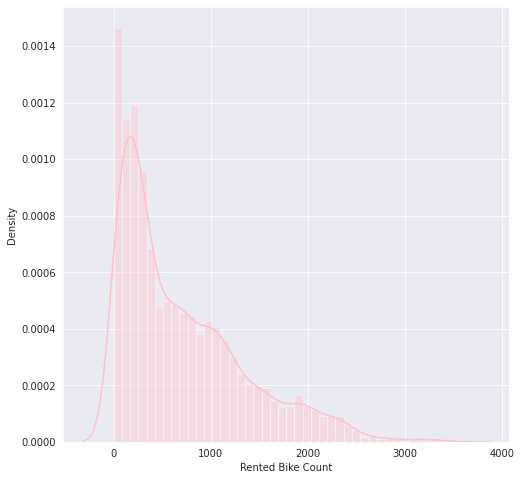

In [90]:
# Dependent variable 'Rented Bike Count'
plt.figure(figsize=(8,8))
sns.distplot(df['Rented Bike Count'],color="PINK");

♦ Here we can clearly see that the distribution of our dependent variable is Right skewed.

♦ we need to transform our dependent variable

In [91]:
# change data type of our dependent variable
df['Rented Bike Count'] = df['Rented Bike Count'].astype(float)

Let's check which transform make our dependent variable in normally distributed

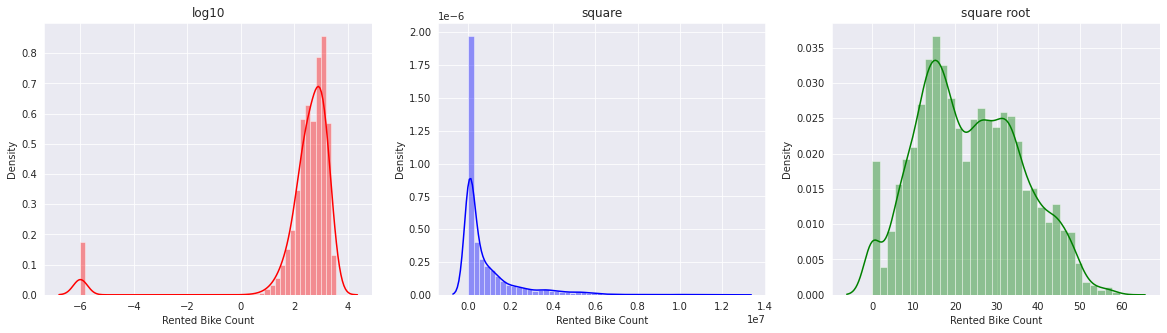

In [92]:
# we apply log, square  and square root transform
fig,axes = plt.subplots(1,3,figsize=(20,5))
sns.distplot(np.log10(df['Rented Bike Count']+0.000001),ax=axes[0],color="r").set_title('log10')
sns.distplot(df['Rented Bike Count']**2,ax=axes[1],color="b").set_title('square')
sns.distplot(np.sqrt(df['Rented Bike Count']),ax=axes[2],color="g").set_title('square root');

Here we can see clearly that square root transform make our data normally distributed

Now we extract our numerical features

In [93]:
# These are the numerical features
numeric_features = df.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

Now we see the distribution of our numerical features except "Rented Bike Count". Because we have already seen the distribution of "Rented Bike Count"

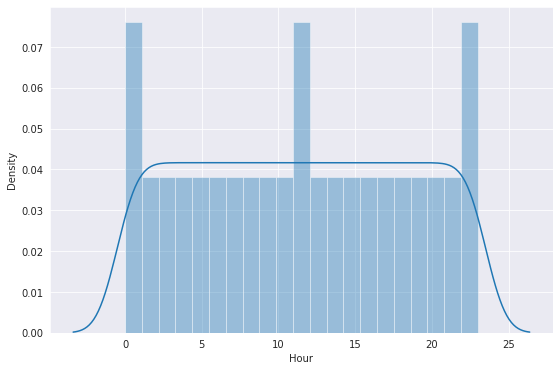

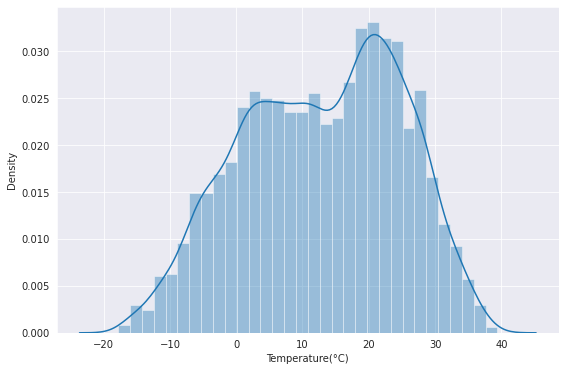

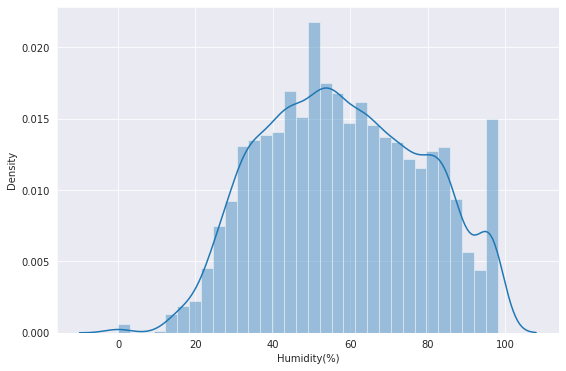

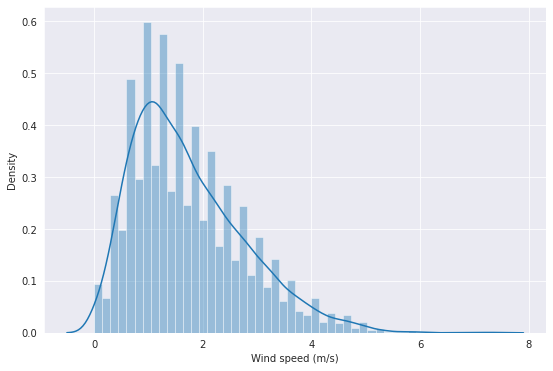

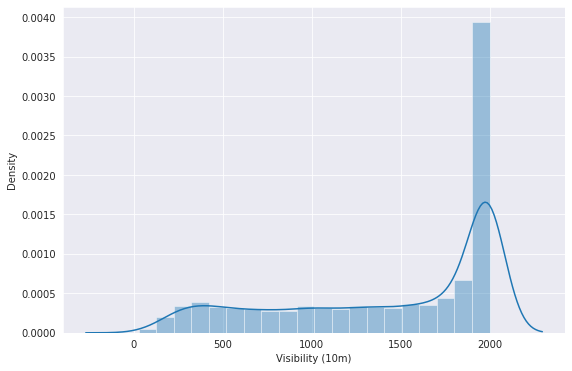

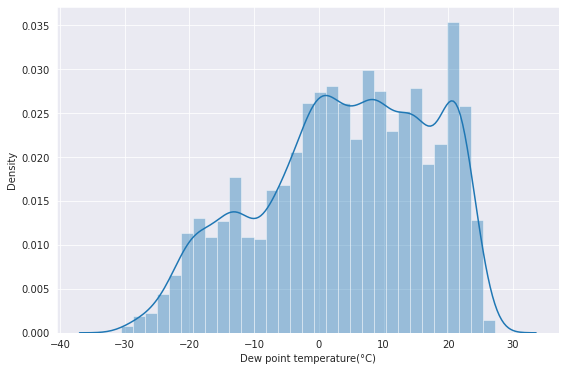

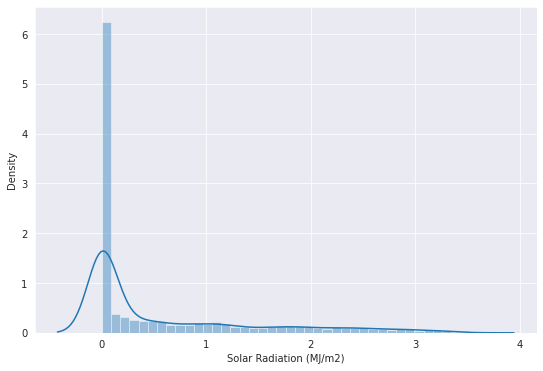

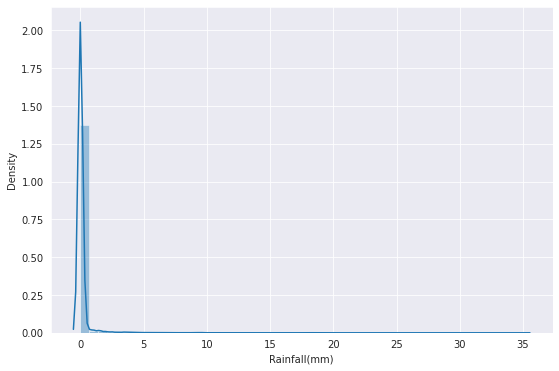

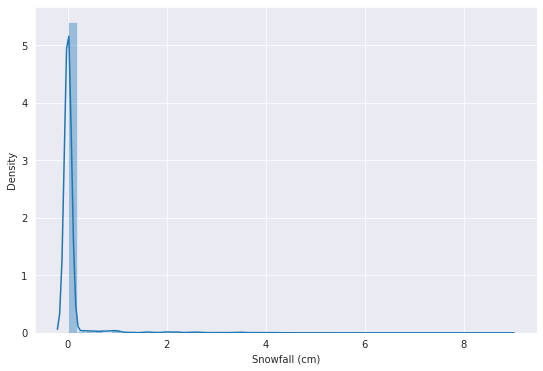

In [94]:
# Distribution of numerical features
for col in numeric_features[:]:
  if col=="Rented Bike Count":
      pass
  else:
    fig = plt.figure(figsize=(9, 6))
    sns.distplot(df[col])

Here we can see that some of the features are not perfectly distributed. Further we'll fix it

Now we will see the distribution of our numerical features about Mean and median

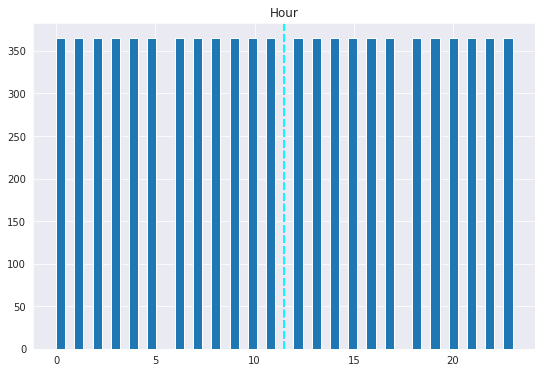

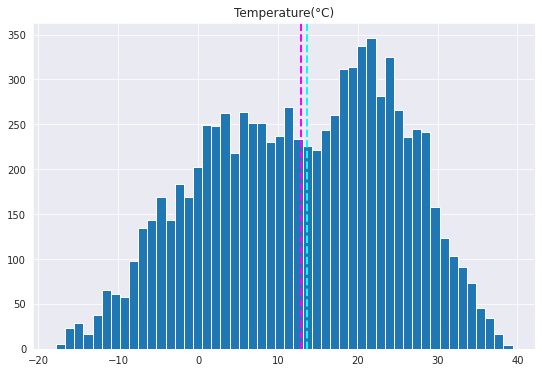

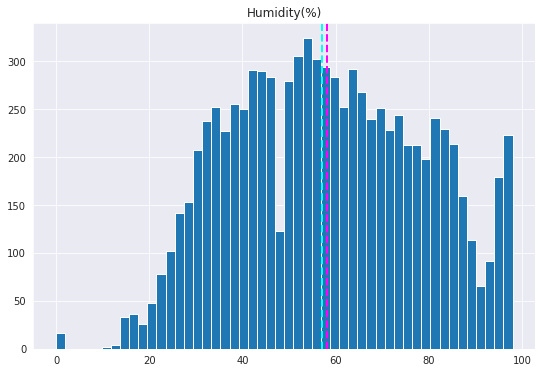

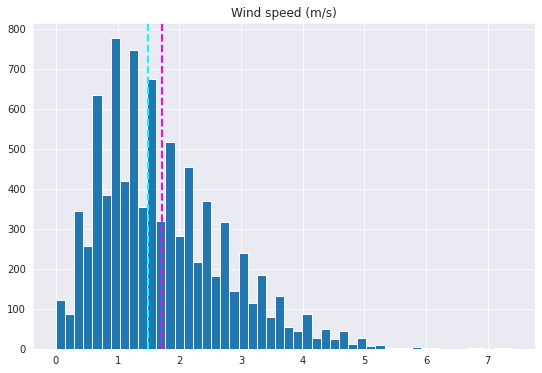

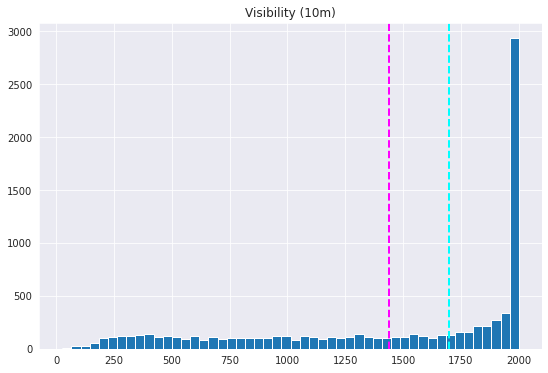

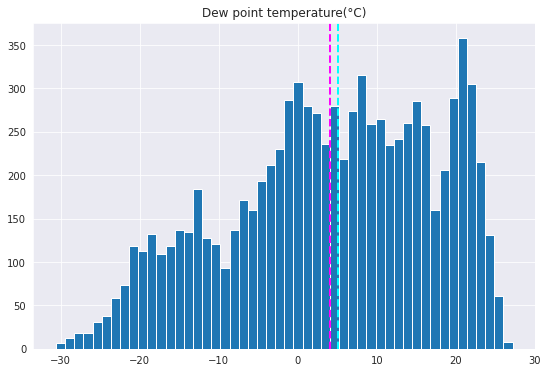

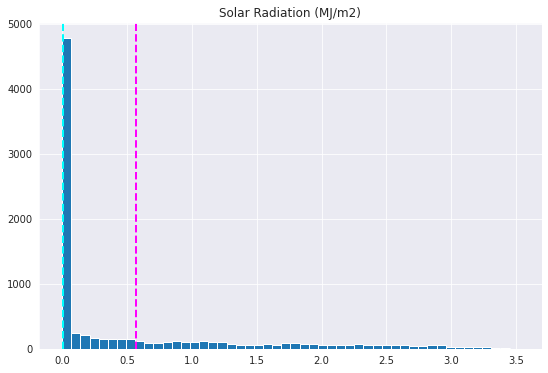

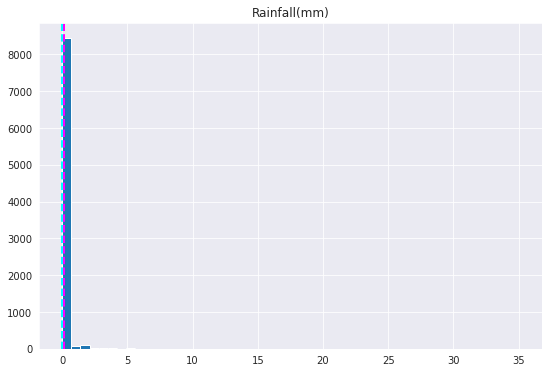

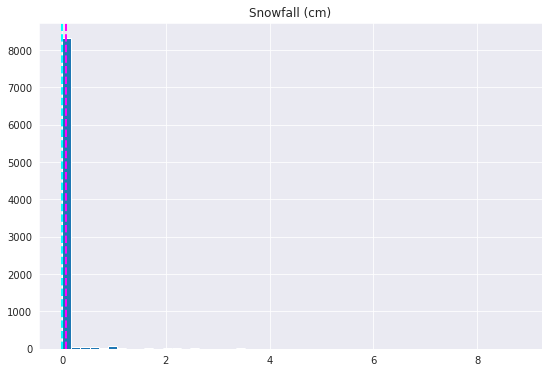

In [95]:
# distribution about mean and median
for col in numeric_features[:]:
  if col=='Rented Bike Count':
    pass
  else:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

Now plot Regression Plot

♦ Here we see the linear relationships between every numeric features to Rented Bike Count

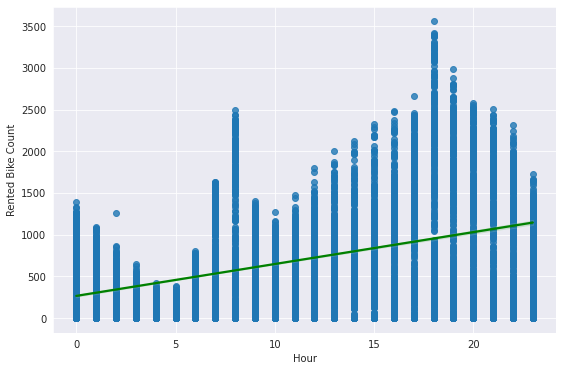

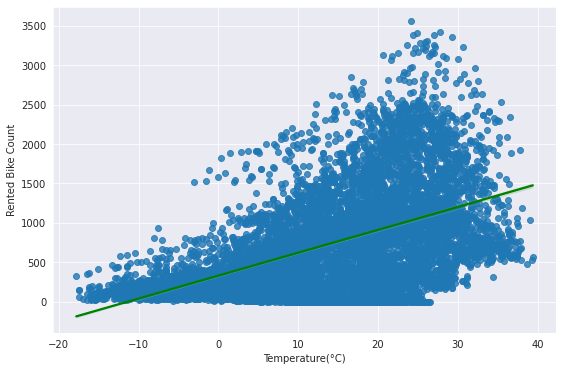

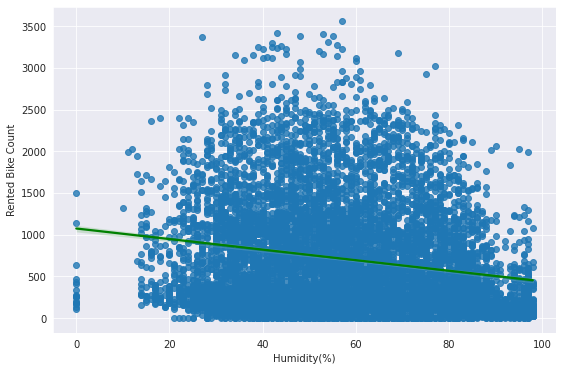

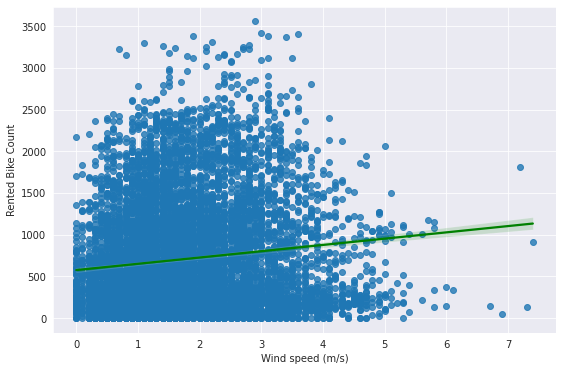

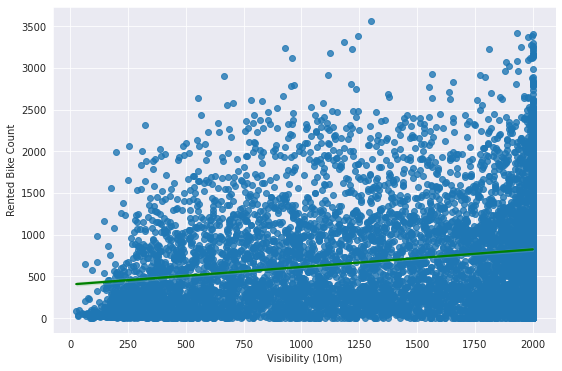

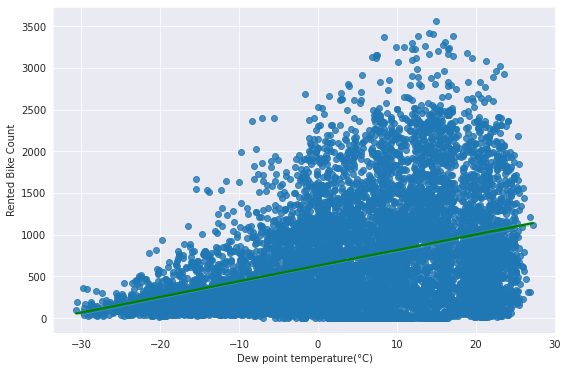

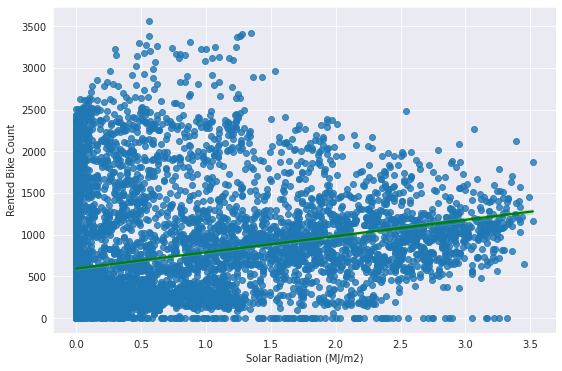

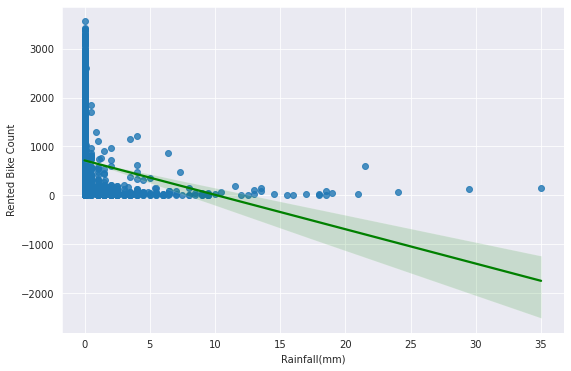

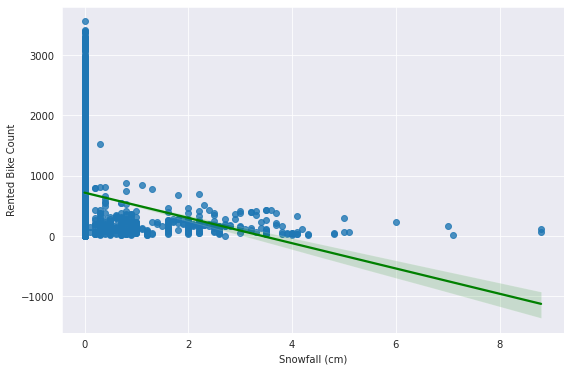

In [96]:
for col in numeric_features[:]:
  if col == 'Rented Bike Count':
    pass
  else:
    fig = plt.figure(figsize=(9, 6))
    sns.regplot(x=df[col],y=df["Rented Bike Count"],line_kws={"color": "green"})
  
  plt.show()

In above plot we can see that some features positive related and some are negatively related with Rented Bike Count

CHECK **OUTLIERS**

For outliers we have to plot box plot

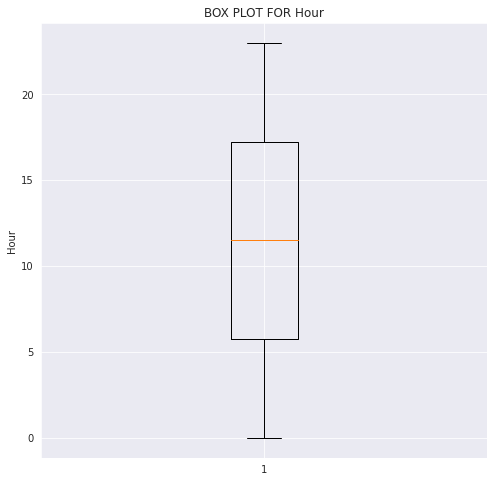

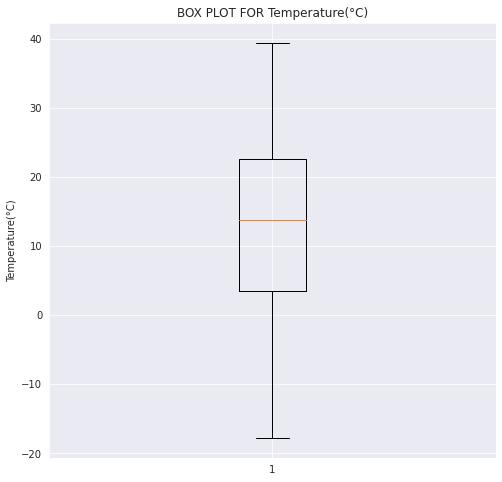

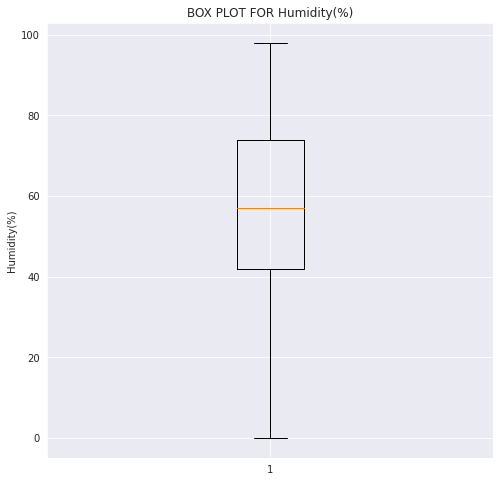

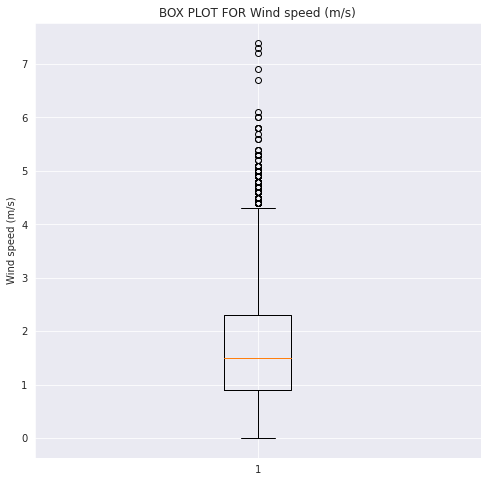

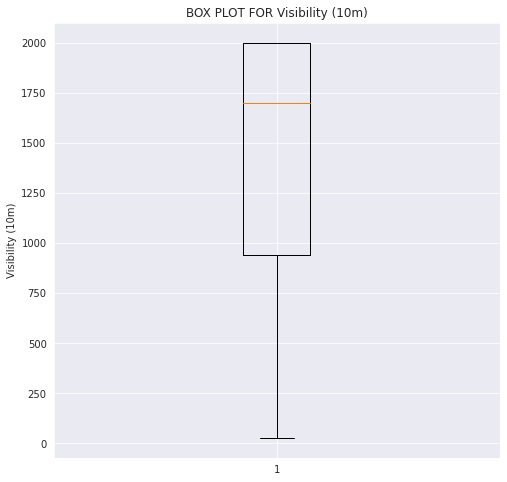

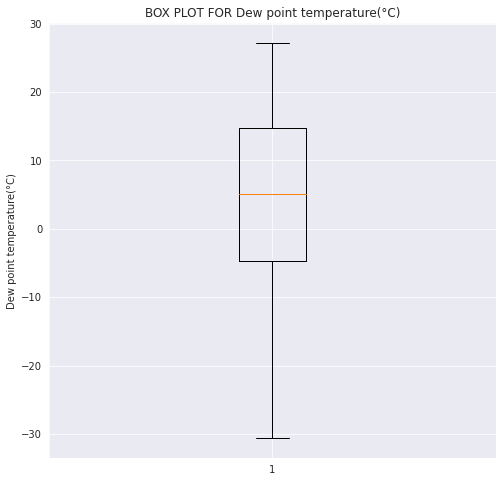

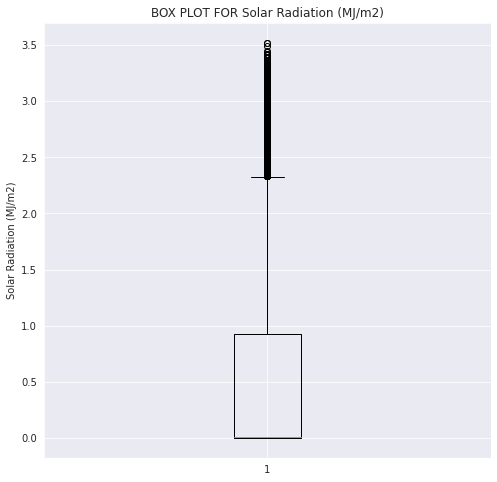

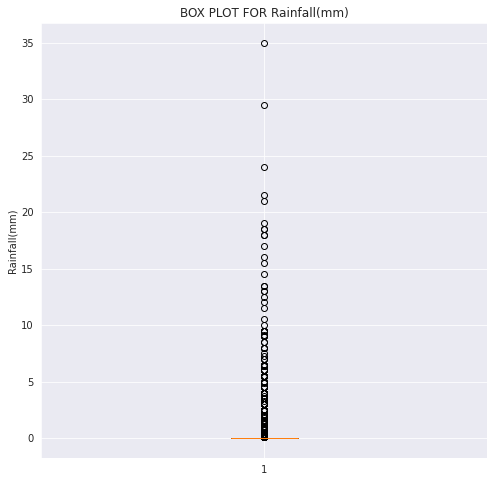

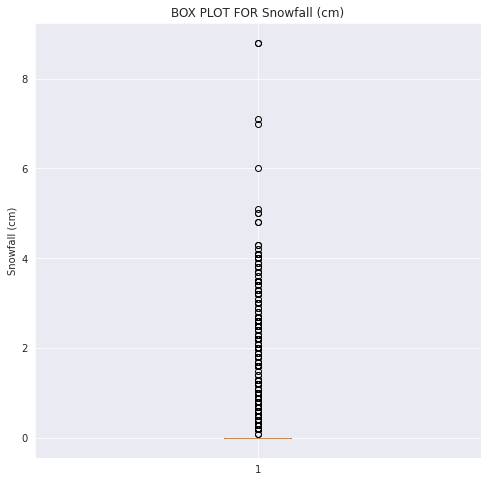

In [97]:
# Box plot for numeric features
for col in numeric_features[1:]:
         plt.figure(figsize=(8,8))
         plt.boxplot(df[col])
         plt.ylabel(col)
         plt.title(f'BOX PLOT FOR {col}');

In above box plot we see some outliers in 'Wind speed (m/s)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)' columns



In [98]:
# here we see some outlier in some coulumn
outlier_column=['Wind speed (m/s)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']

**Let's remove outliers**

In [99]:
# find  q1  and q3 for outliers column

q1=df[outlier_column].quantile(0.25)
q3=df[outlier_column].quantile(0.75)
print(q1)
print(q3)

Wind speed (m/s)           0.9
Solar Radiation (MJ/m2)    0.0
Rainfall(mm)               0.0
Snowfall (cm)              0.0
Name: 0.25, dtype: float64
Wind speed (m/s)           2.30
Solar Radiation (MJ/m2)    0.93
Rainfall(mm)               0.00
Snowfall (cm)              0.00
Name: 0.75, dtype: float64


In [100]:
# find iqr for outlier columns
iqr=q3-q1
lower_acceptable_limt=q1-iqr*1.5
upper_acceptable_limt=q3+iqr*1.5
print(lower_acceptable_limt)
print(upper_acceptable_limt)

Wind speed (m/s)          -1.200
Solar Radiation (MJ/m2)   -1.395
Rainfall(mm)               0.000
Snowfall (cm)              0.000
dtype: float64
Wind speed (m/s)           4.400
Solar Radiation (MJ/m2)    2.325
Rainfall(mm)               0.000
Snowfall (cm)              0.000
dtype: float64


In [101]:
# for removing outliers, we replace outler to upper acceptable limit and lower acceptable limit of Solar radiation
df.loc[df['Solar Radiation (MJ/m2)']>upper_acceptable_limt['Solar Radiation (MJ/m2)'],'Solar Radiation (MJ/m2)']=upper_acceptable_limt['Solar Radiation (MJ/m2)']
df.loc[df['Solar Radiation (MJ/m2)']<lower_acceptable_limt['Solar Radiation (MJ/m2)'],'Solar Radiation (MJ/m2)']=lower_acceptable_limt['Solar Radiation (MJ/m2)']

In [102]:
# for removing outliers, we replace outlier to upper acceptable limit and lower acceptable limit of wind speed
df.loc[df['Wind speed (m/s)']>upper_acceptable_limt['Wind speed (m/s)'],'Wind speed (m/s)']=upper_acceptable_limt['Wind speed (m/s)']
df.loc[df['Wind speed (m/s)']<lower_acceptable_limt['Wind speed (m/s)'],'Wind speed (m/s)']=lower_acceptable_limt['Wind speed (m/s)']

In [103]:
# for removing outliers from Snowfall we replace outliers to  0.95 quantile and 0.05 quantile 
df.loc[df['Snowfall (cm)']>df['Snowfall (cm)'].quantile(0.95),'Snowfall (cm)']=df['Snowfall (cm)'].quantile(0.95)
df.loc[df['Snowfall (cm)']<df['Snowfall (cm)'].quantile(0.05),'Snowfall (cm)']=df['Snowfall (cm)'].quantile(0.05)

In [104]:
# for removing outliers from raminfall we replace outliers to  0.95 quantile and 0.05 quantile 
df.loc[df['Rainfall(mm)']>df['Rainfall(mm)'].quantile(0.95),'Rainfall(mm)']=df['Rainfall(mm)'].quantile(0.95)
df.loc[df['Rainfall(mm)']<df['Rainfall(mm)'].quantile(0.05),'Rainfall(mm)']=df['Rainfall(mm)'].quantile(0.05)

In [105]:
# let's check our data after removing outliers
df.shape

(8760, 14)

After removing outliers we have 8760 rows and 14 columns

*Now let's do some feature engineering *

In [106]:
# extract some features from date column
df['Month'] = df.Date.dt.month_name()
df['day']=df.Date.dt.day_name()

We get 'month name' and 'day name' from Date column



In [107]:
# Remove Date column because we  have extricated important features from Date column
df.drop(['Date'], axis=1,inplace=True)

In [108]:
# Now check our columns name
df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,day
0,254.0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,January,Thursday
1,204.0,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,January,Thursday
2,173.0,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,January,Thursday
3,107.0,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,January,Thursday
4,78.0,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,January,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003.0,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,November,Friday
8756,764.0,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,November,Friday
8757,694.0,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,November,Friday
8758,712.0,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,November,Friday


**Now let's do EDA in categorical data**

In [109]:
# Total number of bike rented in particular Season
no_of_bikeshare_in_season=df.groupby(['Seasons'])['Rented Bike Count'].sum().sort_values(ascending=False).reset_index()
no_of_bikeshare_in_season

,Seasons,Rented Bike Count
0,Summer,2283234.0
1,Autumn,1790002.0
2,Spring,1611909.0
3,Winter,487169.0


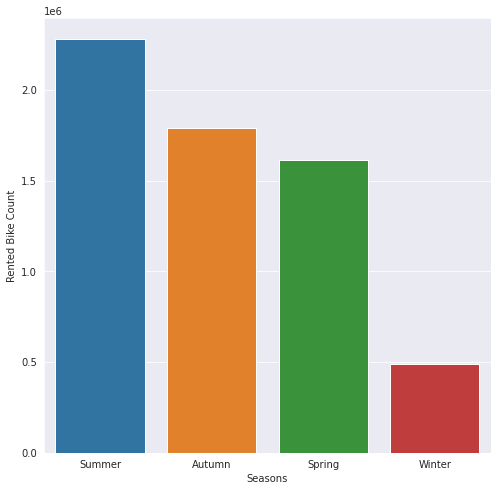

In [110]:
# Plot a bar plot to show the rented bike count in seasons
plt.figure(figsize=(8,8))
sns.barplot(data=no_of_bikeshare_in_season, x="Seasons", y="Rented Bike Count");

♦ In above bar plot we can see most people rented bike in summer season

♦ Because the weather is warmer and more favorable for outdoor activities

♦ In winter season due to cold weather,snow and poor visibility people don't prefer ranted bike

In [111]:
# Total number of bike rented in  holiday and non holiday
no_of_bikeshare_in_Holiday=df.groupby(['Holiday'])['Rented Bike Count'].sum().reset_index()
no_of_bikeshare_in_Holiday

,Holiday,Rented Bike Count
0,Holiday,215895.0
1,No Holiday,5956419.0


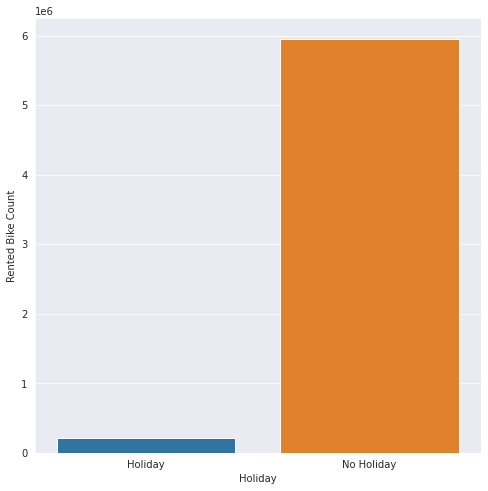

In [112]:
#  Plot a bar plot to show the rented bike count in holiday and non holiday
plt.figure(figsize=(8,8))
sns.barplot(data=no_of_bikeshare_in_Holiday, x="Holiday", y="Rented Bike Count");

♦ In above bar plot we can say that in non holiday people go to offices and they rented bike

♦ But people take bikes on rent to Roaming on holidays.

In [113]:
# Total number of bike rented in Functioning Day
no_of_bikeshare_in_Functioning_Day=df.groupby(['Functioning Day'])['Rented Bike Count'].sum().reset_index()
no_of_bikeshare_in_Functioning_Day

,Functioning Day,Rented Bike Count
0,No,0.0
1,Yes,6172314.0


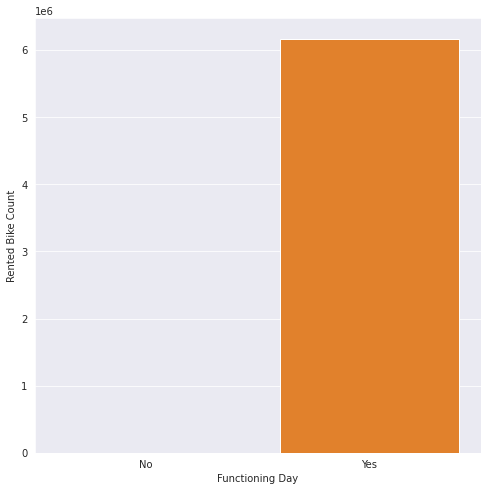

In [114]:
#  Plot a bar plot to show the rented bike count in Functioning Day
plt.figure(figsize=(8,8))
sns.barplot(data=no_of_bikeshare_in_Functioning_Day, x="Functioning Day", y="Rented Bike Count");

♦ In above bar plot we can say that people rented bike in function day

In [115]:
# total number of bike rented in every month
no_of_bikeshare_in_Month=df.groupby(['Month'])['Rented Bike Count'].sum().sort_values(ascending=False).reset_index()
no_of_bikeshare_in_Month

,Month,Rented Bike Count
0,June,706728.0
1,July,691339.0
2,May,665948.0
3,October,626988.0
4,August,614190.0
5,April,556219.0
6,September,499326.0
7,November,493412.0
8,March,455037.0
9,December,311771.0


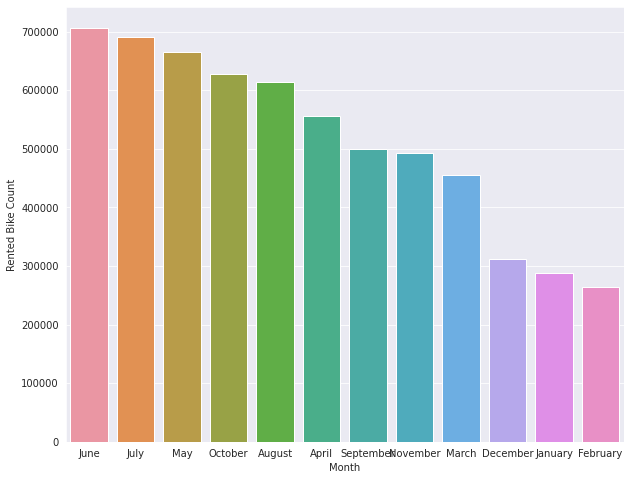

In [116]:
#  Plot a bar plot to show the rented bike count in "Month"
plt.figure(figsize=(10,8))
sns.barplot(data=no_of_bikeshare_in_Month, x="Month", y="Rented Bike Count");

♦ In above bar plot we can say that most of the bike rented in june and july month because this is summer time and weather is warmer and more favorable for outdoor activities

♦ In December to march this is winter time so due to cold weather,snow and poor visibility people don't prefer ranted bike

In [117]:
# total number of bike rented in weekday
no_of_bikeshare_in_day=df.groupby(['day'])['Rented Bike Count'].sum().sort_values(ascending=False).reset_index()
no_of_bikeshare_in_day

,day,Rented Bike Count
0,Thursday,928267.0
1,Saturday,911475.0
2,Wednesday,908871.0
3,Friday,898966.0
4,Monday,863563.0
5,Tuesday,862877.0
6,Sunday,798295.0


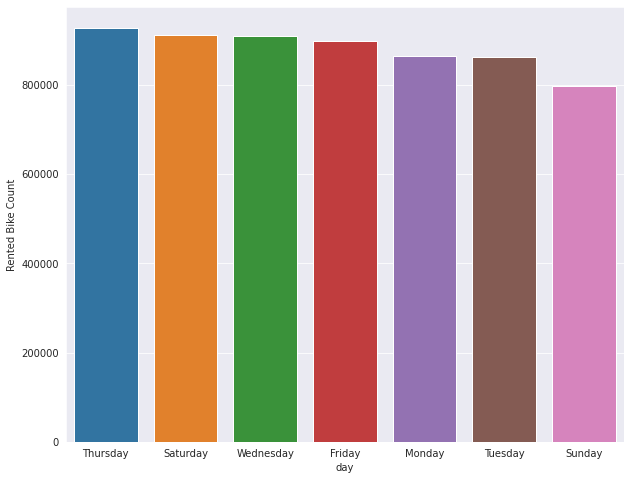

In [118]:
#  Plot a bar plot to show the rented bike count in "weekday"
plt.figure(figsize=(10,8))
sns.barplot(data=no_of_bikeshare_in_day, x="day", y="Rented Bike Count");

♦ We know that sunday is off day so people don't go to office that's why rented bike count is low in sunday



In [119]:
# total number of bike rented in 'per hour'
average_of_bikeshare_in_hour=df.groupby(['Hour'])['Rented Bike Count'].sum().reset_index()
average_of_bikeshare_in_hour

,Hour,Rented Bike Count
0,0,197633.0
1,1,155557.0
2,2,110095.0
3,3,74216.0
4,4,48396.0
5,5,50765.0
6,6,104961.0
7,7,221192.0
8,8,370731.0
9,9,235784.0


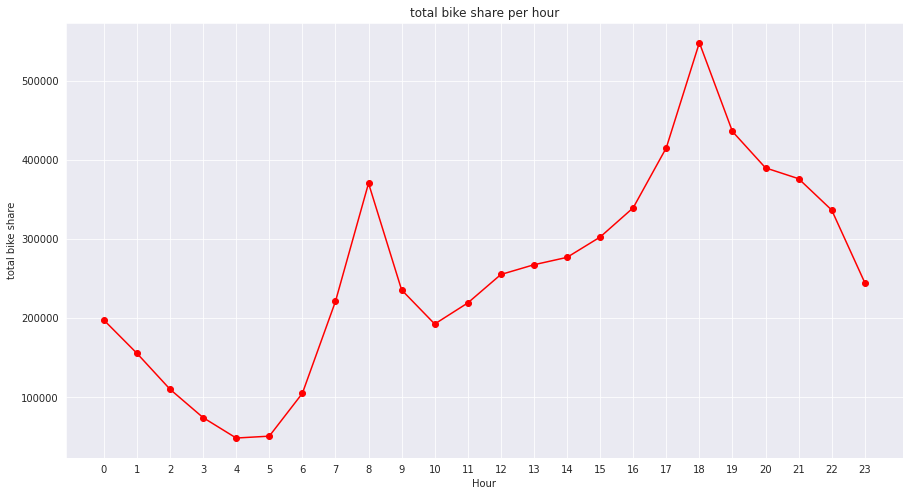

In [120]:
#  Plot a line chart to show the rented bike count in "per hour"
plt.figure(figsize=(15,8))
sns.set_style("darkgrid")
plt.plot(average_of_bikeshare_in_hour['Hour'],average_of_bikeshare_in_hour['Rented Bike Count'], marker='o', c='red')
plt.xlabel('Hour')
plt.ylabel('total bike share')
plt.title('total bike share per hour')
plt.xticks(average_of_bikeshare_in_hour['Hour']);

♦ we know that 7am - 9am people go to office that's why rented bike count is high this time

♦ similarly people return from office at 5pm - 7pm that's why rented bike count is high at this time

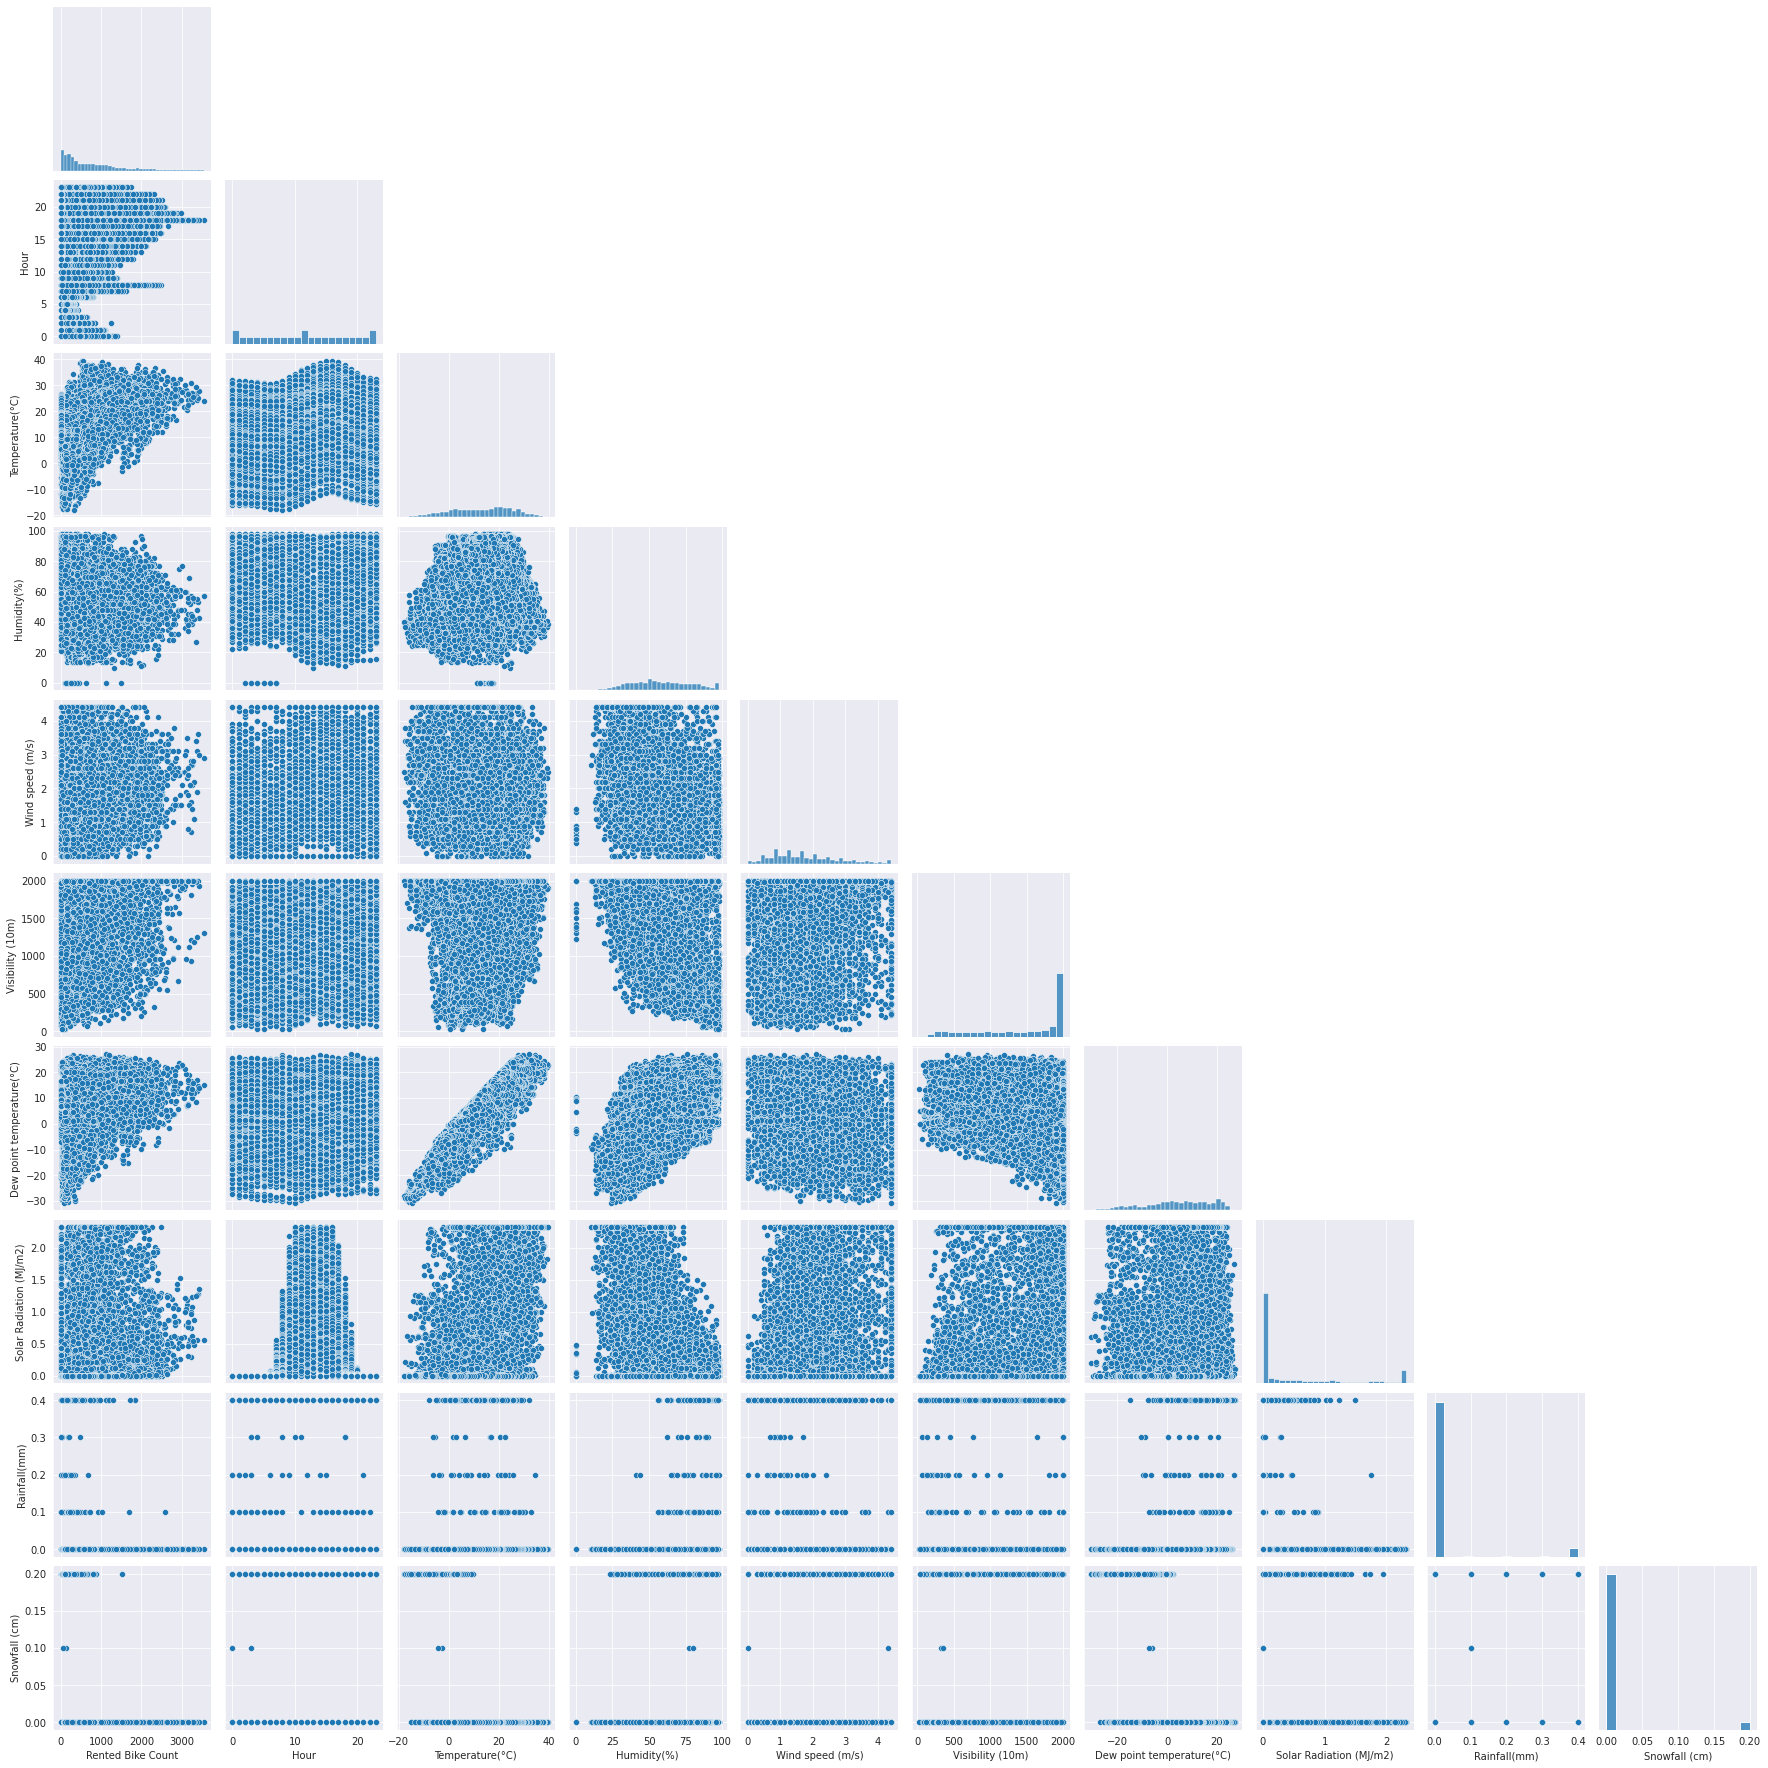

In [121]:
#ploting pairplot for more info
sns.pairplot(df, corner=True)

♦ pair plot shows the correlation




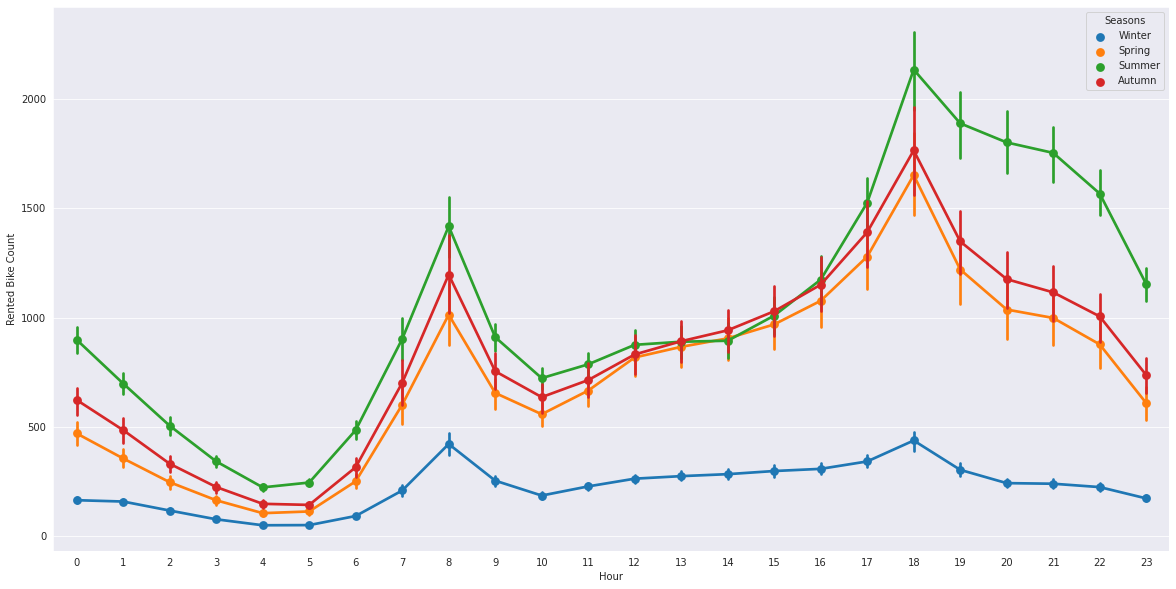

In [122]:
 #plot point plot for categorical column
plt.figure(figsize=(20,10))
sns.pointplot(x=df["Hour"],y=df['Rented Bike Count'],hue=df["Seasons"]);


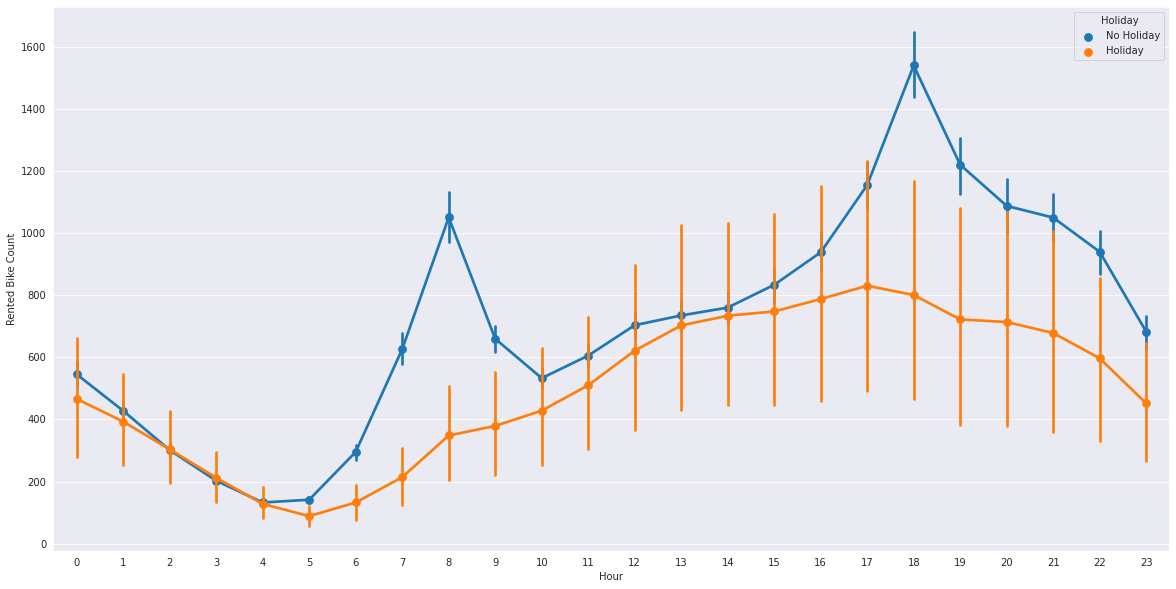

In [123]:
plt.figure(figsize=(20,10))
sns.pointplot(x=df["Hour"],y=df['Rented Bike Count'],hue=df["Holiday"]);



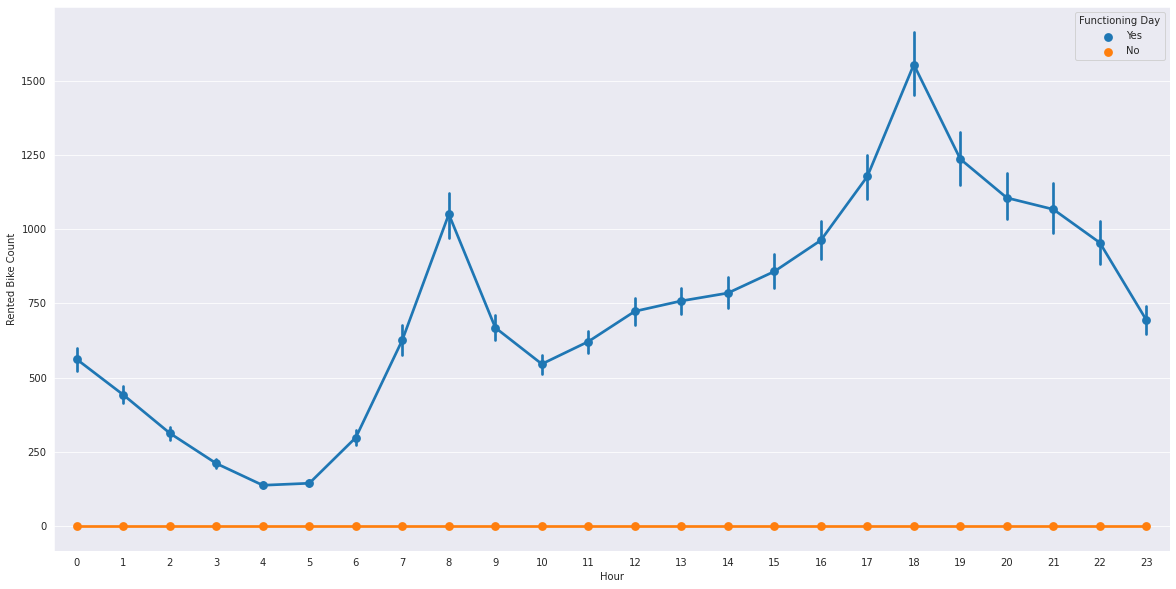

In [124]:
plt.figure(figsize=(20,10))
sns.pointplot(x=df["Hour"],y=df['Rented Bike Count'],hue=df["Functioning Day"]);


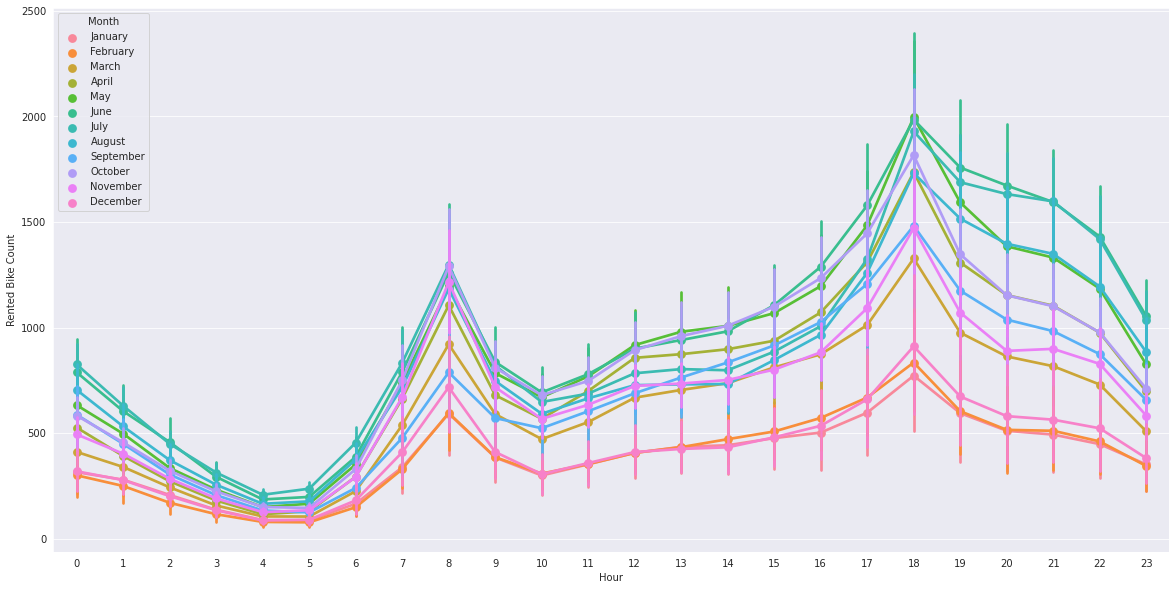

In [125]:
plt.figure(figsize=(20,10))
sns.pointplot(x=df["Hour"],y=df['Rented Bike Count'],hue=df["Month"]);

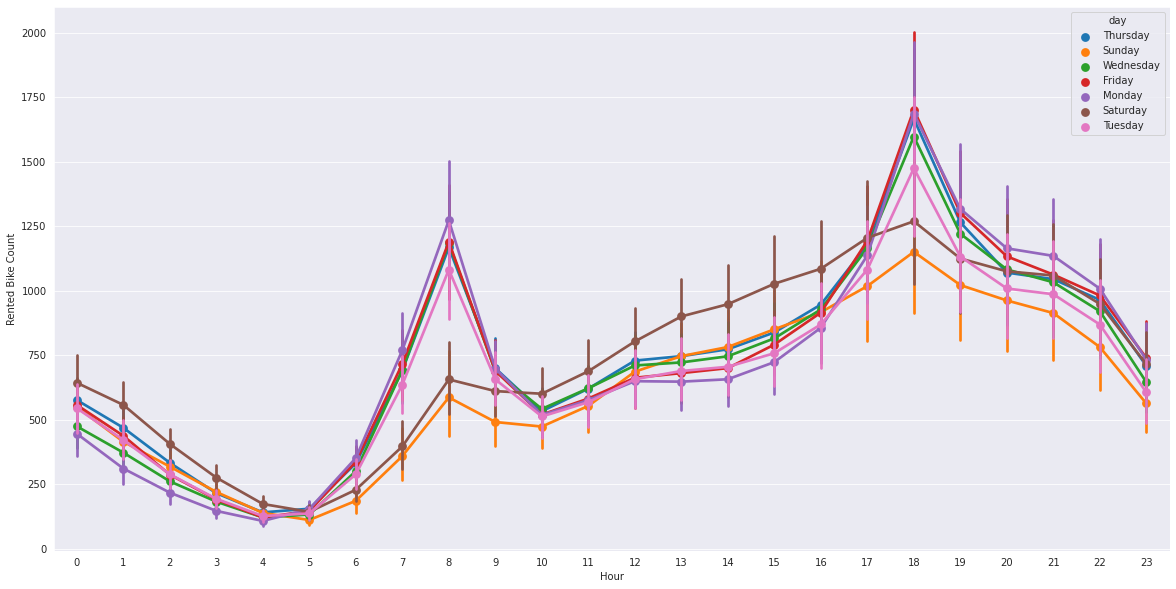

In [126]:
plt.figure(figsize=(20,10))
sns.pointplot(x=df["Hour"],y=df['Rented Bike Count'],hue=df["day"]);

*Let's plot correlation plot which tell us correlation between every feature *

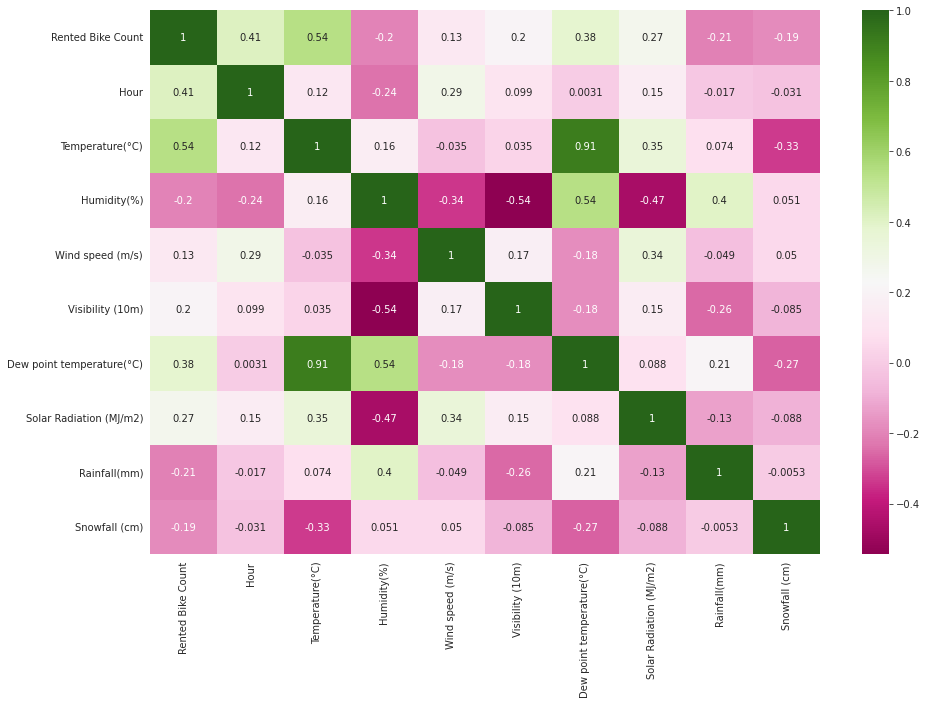

In [127]:
# correlation plot
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='PiYG',annot=True);

♦ By correlation we can say that 'Dew point temperature(°C)' and Temperature(°C) columns are highly correlated

♦ So we have to remove one column

♦ Now we calculate VIF which tell us which column is of less useful for prediction

**Variance Inflation Factor (VIF) values of Independent Variables.**

**Variance inflation factor (VIF)** is a measure of the amount of multicollinearity in a set of multiple regression variables. Mathematically, the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable. This ratio is calculated for each independent variable. A high VIF indicates that the associated independent variable is highly collinear with the other variables in the model.



In [128]:
# Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [129]:
# removing Multicollinearity
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)'] ]])

,variables,VIF
0,Hour,3.934093
1,Temperature(°C),3.428086
2,Humidity(%),5.317613
3,Wind speed (m/s),4.817870
4,Visibility (10m),4.874560
5,Solar Radiation (MJ/m2),2.325648
6,Rainfall(mm),1.247486
7,Snowfall (cm),1.222033


In [130]:
# Drop Dew point temperature(°C) column
df.drop(columns=['Dew point temperature(°C)'],inplace=True)

In [131]:
# now check correlation with rented bike count
df.corr()['Rented Bike Count']

Rented Bike Count          1.000000
Hour                       0.410257
Temperature(°C)            0.538558
Humidity(%)               -0.199780
Wind speed (m/s)           0.126161
Visibility (10m)           0.199280
Solar Radiation (MJ/m2)    0.267543
Rainfall(mm)              -0.210487
Snowfall (cm)             -0.185719
Name: Rented Bike Count, dtype: float64

categorical features

In [132]:
# columns name of categorical features
categorical_features = df.describe(include=['object','category']).columns
categorical_features

Index(['Seasons', 'Holiday', 'Functioning Day', 'Month', 'day'], dtype='object')

In [133]:
### Data encoding
#label encoding
encoders_nums = {"Holiday":{"Holiday":0,"No Holiday":1},
                 "Functioning Day":{"Yes":1,"No":0}
                 }

df= df.replace(encoders_nums)

♦ Replace holiday as 0 and non holiday as 1 because in non holiday people rented the bike more

♦ Replace non Functioning Day as 0 and Functioning Day as 1 because in Functioning Day people rented the bike more




In [134]:
# Now Seasons, month,day replace with dummies variables 
df = pd.get_dummies(df, columns=["Seasons", "Month","day"])

In [135]:
# now check info  after categorical features treatment 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   float64
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Holiday                  8760 non-null   int64  
 10  Functioning Day          8760 non-null   int64  
 11  Seasons_Autumn           8760 non-null   uint8  
 12  Seasons_Spring           8760 non-null   uint8  
 13  Seasons_Summer           8760 non-null   uint8  
 14  Seasons_Winter          

In [136]:
# check dataset before prediction 
df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,...,Month_November,Month_October,Month_September,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,254.0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,1,0,0
1,204.0,1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,1,0,0
2,173.0,2,-6.0,39,1.0,2000,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,1,0,0
3,107.0,3,-6.2,40,0.9,2000,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,1,0,0
4,78.0,4,-6.0,36,2.3,2000,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003.0,19,4.2,34,2.6,1894,0.0,0.0,0.0,1,...,1,0,0,1,0,0,0,0,0,0
8756,764.0,20,3.4,37,2.3,2000,0.0,0.0,0.0,1,...,1,0,0,1,0,0,0,0,0,0
8757,694.0,21,2.6,39,0.3,1968,0.0,0.0,0.0,1,...,1,0,0,1,0,0,0,0,0,0
8758,712.0,22,2.1,41,1.0,1859,0.0,0.0,0.0,1,...,1,0,0,1,0,0,0,0,0,0


In [137]:
# check correlations with each column
print(df.corr())

                         Rented Bike Count          Hour  Temperature(°C)  \
Rented Bike Count                 1.000000  4.102573e-01         0.538558   
Hour                              0.410257  1.000000e+00         0.124114   
Temperature(°C)                   0.538558  1.241145e-01         1.000000   
Humidity(%)                      -0.199780 -2.416438e-01         0.159371   
Wind speed (m/s)                  0.126161  2.887271e-01        -0.034829   
Visibility (10m)                  0.199280  9.875348e-02         0.034794   
Solar Radiation (MJ/m2)           0.267543  1.516625e-01         0.348584   
Rainfall(mm)                     -0.210487 -1.709022e-02         0.074428   
Snowfall (cm)                    -0.185719 -3.147396e-02        -0.332904   
Holiday                           0.072338  1.289087e-16         0.055931   
Functioning Day                   0.203943  5.439377e-03        -0.050170   
Seasons_Autumn                    0.102753  1.991407e-15         0.059728   

In [138]:
# Total columns after treatment 
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Functioning Day',
       'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Month_April', 'Month_August', 'Month_December', 'Month_February',
       'Month_January', 'Month_July', 'Month_June', 'Month_March', 'Month_May',
       'Month_November', 'Month_October', 'Month_September', 'day_Friday',
       'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday',
       'day_Tuesday', 'day_Wednesday'],
      dtype='object')

In [139]:
 #independent variable 
features=df.columns[1:]
features

Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Holiday', 'Functioning Day', 'Seasons_Autumn',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Month_April',
       'Month_August', 'Month_December', 'Month_February', 'Month_January',
       'Month_July', 'Month_June', 'Month_March', 'Month_May',
       'Month_November', 'Month_October', 'Month_September', 'day_Friday',
       'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday',
       'day_Tuesday', 'day_Wednesday'],
      dtype='object')

In [140]:
len(features)

33

Train Test Split
Splitting Data

X = Independent Variable

y = Dependent Variable

In [141]:
# Splitting our data into Dependent and Independent Variables
# Data transformation
from scipy.stats import zscore
X = df[features].apply(zscore)

In [142]:
y=np.sqrt(df['Rented Bike Count'])

In [143]:
# splitting the dataset into the training set and test set 
# splitting the Train test data with 80 - 20
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 

In [144]:
X_train.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,...,Month_November,Month_October,Month_September,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
2031,0.505621,-0.392068,0.185340,-1.106995,-1.883764,0.870685,-0.245267,-0.230654,0.227757,0.18668,...,-0.299253,-0.304655,-0.299253,2.481303,-0.39841,-0.407596,-0.416693,-0.407596,-0.412155,-0.412155
6570,0.939010,1.299137,-0.060225,0.678492,0.925871,0.386805,-0.245267,-0.230654,0.227757,0.18668,...,-0.299253,-0.304655,-0.299253,2.481303,-0.39841,-0.407596,-0.416693,-0.407596,-0.412155,-0.412155
6371,-0.072232,1.424721,-0.060225,-0.015864,0.912719,0.437740,0.870858,-0.230654,0.227757,0.18668,...,-0.299253,-0.304655,-0.299253,-0.403014,-0.39841,-0.407596,-0.416693,2.453412,-0.412155,-0.412155
3490,-0.216695,0.160504,-1.435386,-1.106995,0.513222,2.118586,-0.245267,-0.230654,0.227757,0.18668,...,-0.299253,-0.304655,-0.299253,-0.403014,-0.39841,-0.407596,-0.416693,-0.407596,-0.412155,2.426271
7700,1.227936,-0.057176,-0.551354,-0.611026,0.925871,-0.682824,-0.245267,-0.230654,0.227757,0.18668,...,-0.299253,3.282407,-0.299253,-0.403014,-0.39841,-0.407596,-0.416693,-0.407596,-0.412155,2.426271


In [145]:
X_test.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,...,Month_November,Month_October,Month_September,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
4059,-1.227936,-0.182761,0.725581,-0.412639,0.925871,-0.682824,-0.245267,-0.230654,0.227757,0.18668,...,-0.299253,-0.304655,-0.299253,-0.403014,-0.39841,2.453412,-0.416693,-0.407596,-0.412155,-0.412155
6914,-1.372399,0.738193,0.971146,-0.710220,0.925871,-0.682824,-0.245267,-0.230654,0.227757,0.18668,...,-0.299253,-0.304655,3.341656,-0.403014,-0.39841,2.453412,-0.416693,-0.407596,-0.412155,-0.412155
233,0.794547,-0.777194,0.332678,2.563172,-0.617866,-0.644623,-0.245267,4.340674,0.227757,0.18668,...,-0.299253,3.282407,-0.299253,-0.403014,-0.39841,-0.407596,-0.416693,2.453412,-0.412155,-0.412155
982,1.516862,-1.890711,-0.354902,1.075267,0.925871,-0.682824,-0.245267,-0.230654,0.227757,0.18668,...,-0.299253,3.282407,-0.299253,-0.403014,2.50998,-0.407596,-0.416693,-0.407596,-0.412155,-0.412155
5967,0.505621,1.734497,-0.011112,1.868816,0.018371,1.838445,-0.245267,-0.230654,0.227757,0.18668,...,-0.299253,-0.304655,-0.299253,2.481303,-0.39841,-0.407596,-0.416693,-0.407596,-0.412155,-0.412155


In [146]:
y_train.head()

2031    17.663522
6570    53.254108
6371    26.664583
3490    27.495454
7700    39.471509
Name: Rented Bike Count, dtype: float64

In [147]:
y_test.head()

4059    17.888544
6914    24.083189
233     15.033296
982     12.845233
5967    25.416530
Name: Rented Bike Count, dtype: float64

In [148]:
# Shape of the Training and Test dataset
print('Shape of X_train is -' , X_train.shape)
print('Shape of X_test is -' , X_test.shape)
print('Shape of y_train is -' , y_train.shape)
print('Shape of y_test is - ', y_test.shape)

Shape of X_train is - (7008, 33)
Shape of X_test is - (1752, 33)
Shape of y_train is - (7008,)
Shape of y_test is -  (1752,)


We will build these regression models for our data.

1.Linear Regression

2.Ridge Rigression

3.Lasso Rigression

4.Elastic Net Regression

5.Decision Tree

6.RandomForest

7.XG Boost Regrression

* By using Cross-Validation, we will able to get more metrics and draw important
conclusion both about our algorithm and our data.


**Implementing Linear Regression**

Linear-regression models are relatively simple and provide an easy-to-interpret mathematical formula that can generate predictions. Linear regression can be applied to various areas in business and academic study.

#You’ll find that linear regression is used in everything from biological, behavioral, environmental and social sciences to business. Linear-regression models have become a proven way to scientifically and reliably predict the future. Because linear regression is a long-established statistical procedure, the properties of linear-regression models are well understood and can be trained very quickly.

#The linear regression model returns an equation that determines the relationship between the independent variables and the dependent variable.


In [149]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [150]:
# Train accuracy of linear regression model
reg.score(X_train, y_train)

0.6985959021996841

In [151]:
reg.coef_

array([ 3.46063477e+00,  6.02165341e+00, -2.23234609e+00,  2.24979104e-01,
        3.45095845e-01, -6.43675322e-01, -3.16346134e+00,  1.52290665e-01,
        5.87198130e-01,  5.18067030e+00, -9.40130579e+12, -9.43555475e+12,
       -9.43555475e+12, -9.36655318e+12,  2.60234253e+12,  2.64140812e+12,
        2.64140812e+12,  2.52159535e+12,  2.64140812e+12,  2.64140812e+12,
        2.60234253e+12,  2.64140812e+12,  2.64140812e+12,  2.60234253e+12,
        2.64140812e+12,  2.60234253e+12, -7.39300987e+13, -7.33181761e+13,
       -7.45324186e+13, -7.57091636e+13, -7.45324186e+13, -7.51253668e+13,
       -7.51253668e+13])

In [152]:
reg.intercept_

23.49371911402251

In [153]:
#prediction of test data
y_pred = reg.predict(X_test)

In [154]:
y_pred

array([20.57184411, 25.91559411, 21.46246911, ..., 16.07184411,
       35.62653161, 23.34528161])

Test Performance of Linear Regregression


In [155]:
from sklearn.metrics import mean_squared_error
MSE_lr  = mean_squared_error((y_test)**2, (y_pred)**2)
print("MSE_lr :" , MSE_lr)
RMSE_lr = np.sqrt(MSE_lr)
print("RMSE_lr :" ,RMSE_lr)

MSE_lr : 159352.08835711962
RMSE_lr : 399.18928888075095


In [156]:
from sklearn.metrics import r2_score
r2_lr = r2_score((y_test)**2, (y_pred)**2)
print("R2_lr :" ,r2_lr)
Adjusted_R2__lr=1-(1-r2_score((y_test)**2, (y_pred)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted_R2__lr :',Adjusted_R2__lr)

R2_lr : 0.6192509251516816
Adjusted_R2__lr : 0.6119373515370166


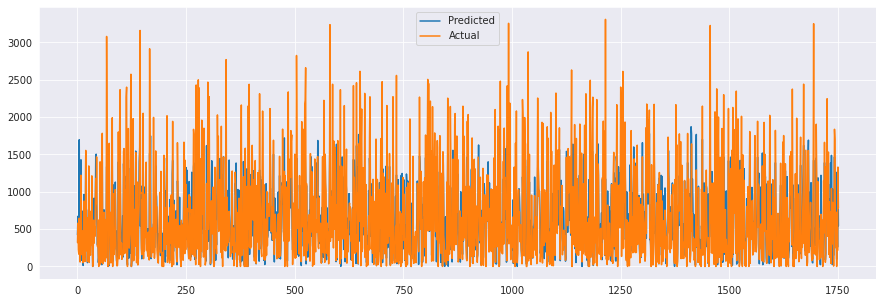

In [157]:
# Actual Price vs predicte for Linear Regression plot
plt.figure(figsize=(15,5))
plt.plot((y_pred)**2)
plt.plot(np.array((y_test)**2))
plt.legend(["Predicted","Actual"])
plt.show()

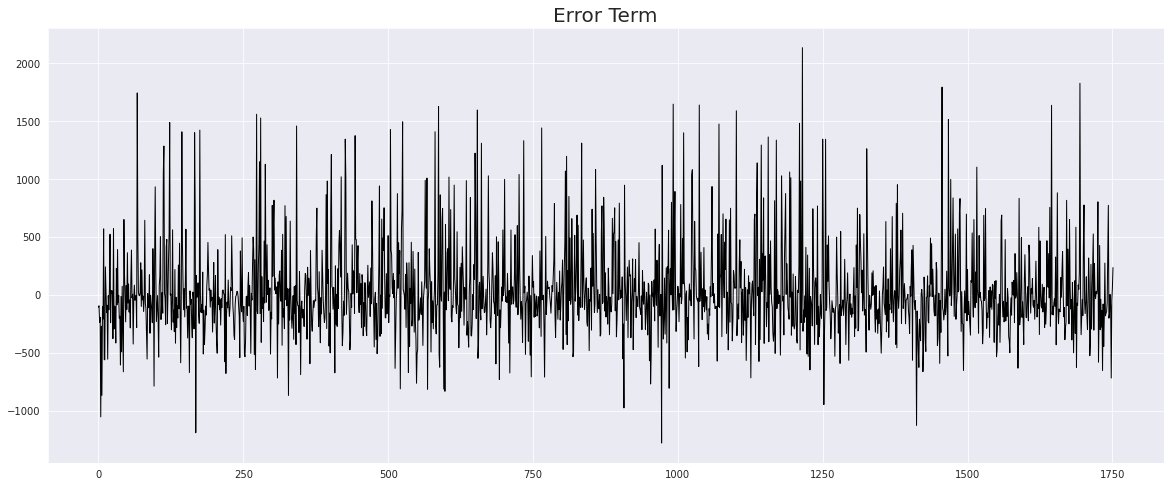

In [159]:
# plot error term
plt.figure(figsize= (20,8))
c= [i for i in range(0, len(y_test))]
plt.plot(c, (np.array((y_test)**2))-((y_pred)**2), color='BLACK', linewidth=1, linestyle='-')
plt.title('Error Term', fontsize=20)
plt.show()

**Ridge and Lasso Regression**


* Ridge and Lasso Regression are types of Regularization techniques

* Regularization techniques are used to deal with overfitting and when the dataset is large

* Ridge and Lasso Regression involve adding penalties to the regression function

📍Implementing Lasso Regression

Lasso Regression

LASSO stands for Least Absolute Shrinkage and Selection Operator. I know it doesn’t give much of an idea but there are 2 key words here – ‘absolute‘ and ‘selection‘.

Lets consider the former first and worry about the latter later.

Lasso regression performs L1 regularization, i.e. it adds a factor of sum of absolute value of coefficients in the optimization objective. Thus, lasso regression optimizes the following:

Objective = RSS + α * (sum of absolute value of coefficients)

Here, α (alpha) is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients. α can take various values. Lets iterate it here briefly:

1. α = 0: Same coefficients as simple linear regression
2. α = ∞: All coefficients zero (same logic as before)
3. 0 < α < ∞: coefficients between 0 and that of simple linear regression



In [ ]:
from sklearn.linear_model import Lasso
lasso_1  = Lasso(alpha=0.001 , max_iter= 3000)
lasso_1.fit(X_train, y_train)

In [ ]:
# Accuracy of lasso regression model
lasso_1.score(X_train, y_train)

In [ ]:
# prediction of test data
y_pred_lasso_1 = lasso_1.predict(X_test)

Test Performance of lasso regression model

In [ ]:
MSE  = mean_squared_error((y_test)**2, (y_pred_lasso_1)**2)
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

In [ ]:
r2 = r2_score((y_test)**2, (y_pred_lasso_1)**2)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test)**2, (y_pred_lasso_1)**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

In [ ]:
# Actual price vs predicted  for lasso regression ploting
plt.figure(figsize=(15,5))
plt.plot((y_pred_lasso_1)**2)
plt.plot(np.array((y_test)**2))
plt.legend(["Predicted","Actual"])
plt.show()

***📈Implemeting Cross Validation ***


Cross-Validation is a resampling technique with the fundamental idea of splitting the dataset into 2 parts- training data and test data. Train data is used to train the model and the unseen test data is used for prediction. If the model performs well over the test data and gives good accuracy, it means the model hasn’t overfitted the training data and can be used for prediction.

* To overcome over-fitting problems, we use a technique called Cross-Validation.

* Let’s dive deep and learn about some of the model evaluation techniques.

In [ ]:
# Hyper parameter of Tuning 
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

In [ ]:
print('the best fit alpha value is -',lasso_regressor.best_params_)